### Using *yfinance* package ###

We will assume that the audience has working knowledge of Python and its ecosystem including pandas. There are innumerable excellent textbooks on the topic; one (of many) I would recommend as background reading is Python for Data Analysis (Second Edition) by Wes McKinney, the author of pandas, https://wesmckinney.com/.

FYI how to install a package using conda:

***conda install -c conda-forge package_name*** 

In [1]:
import yfinance as yf
import pandas as pd

In [2]:
objY = yf.Ticker("C")
esgData = objY.sustainability.T

In [3]:
esgData["ticker"] = str(objY.ticker)
esgData

2021-5,palmOil,controversialWeapons,gambling,socialScore,nuclear,furLeather,alcoholic,gmo,catholic,socialPercentile,...,coal,pesticides,adult,percentile,peerGroup,smallArms,environmentScore,governancePercentile,militaryContract,ticker
Value,False,False,False,11.43,False,False,False,False,False,None,...,False,False,False,44.53,Banks,False,1.47,None,False,C


In [4]:
esgData = pd.DataFrame()
for ii in ["BA", "WMT", "PG", "MCD", "JNJ", "AAPL", "MSFT", "V", "HD"]:
    objY = yf.Ticker(ii)
    try:
        if objY.sustainability is not None:
            v = objY.sustainability.T
            v["ticker"] = str(objY.ticker)
            esgData = esgData.append(v)
    except IndexError:
        pass

In [5]:
esgData.set_index("ticker", inplace=True)
esgData.T

ticker,BA,WMT,PG,MCD,JNJ,AAPL,MSFT,V,HD
2021-5,,,,,,,,,
palmOil,False,False,False,False,False,False,False,False,False
controversialWeapons,True,False,False,False,False,False,False,False,False
gambling,False,False,False,False,False,False,False,False,False
socialScore,19.66,17.2,9.47,14.65,19.91,7.69,9.37,9.83,4.85
nuclear,False,False,False,False,False,False,False,False,False
furLeather,False,False,False,False,False,False,False,False,False
alcoholic,False,False,False,False,False,False,False,False,False
gmo,False,False,False,False,False,False,False,False,False
catholic,False,False,False,False,True,False,False,False,False


### How does *yfinance* populate the sustainability table internally? ###

In [6]:
??yf

In [7]:
import requests
import json
import re

In [10]:
ticker_url = "https://finance.yahoo.com/quote/C"
html = requests.get(url=ticker_url, headers=user_agent_headers).text

In [11]:
html

'<!DOCTYPE html><html id="atomic" class="NoJs chrome desktop" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark(\'PageStart\');</script><meta charset="utf-8"/><title>Citigroup, Inc. (C) Stock Price, News, Quote &amp; History - Yahoo Finance</title><meta name="keywords" content="C, Citigroup, Inc., C stock chart, Citigroup, Inc. stock chart, stock chart, stocks, quotes, finance"/><meta http-equiv="x-dns-prefetch-control" content="on"/><meta property="twitter:dnt" content="on"/><meta property="fb:app_id" content="458584288257241"/><meta name="theme-color" content="#400090"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" lang="en-US" content="Find the latest Citigroup, Inc. (C) stock quote, history, news and other vital information to help you with your stock trading and investing."/><meta name="oath:guce:consent-host" content="guce.yahoo.com"/><meta name="msvali

In [9]:
user_agent_headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36"}

In [12]:
json_str = html.split("root.App.main =")[1].split("(this)")[0].split(";\n}")[0].strip()
data = json.loads(json_str)["context"]["dispatcher"]["stores"]["QuoteSummaryStore"]
data

{'defaultKeyStatistics': {'annualHoldingsTurnover': {},
  'enterpriseToRevenue': {'raw': -3.023, 'fmt': '-3.02'},
  'beta3Year': {},
  'profitMargins': {'raw': 0.30115998, 'fmt': '30.12%'},
  'enterpriseToEbitda': {},
  '52WeekChange': {'raw': 0.39439654, 'fmt': '39.44%'},
  'morningStarRiskRating': {},
  'forwardEps': {'raw': 7.79, 'fmt': '7.79'},
  'revenueQuarterlyGrowth': {},
  'sharesOutstanding': {'raw': 2026790016,
   'fmt': '2.03B',
   'longFmt': '2,026,790,016'},
  'fundInceptionDate': {},
  'annualReportExpenseRatio': {},
  'totalAssets': {},
  'bookValue': {'raw': 90.865, 'fmt': '90.86'},
  'sharesShort': {'raw': 36814941, 'fmt': '36.81M', 'longFmt': '36,814,941'},
  'sharesPercentSharesOut': {'raw': 0.0182, 'fmt': '1.82%'},
  'fundFamily': None,
  'lastFiscalYearEnd': {'raw': 1609372800, 'fmt': '2020-12-31'},
  'heldPercentInstitutions': {'raw': 0.78342, 'fmt': '78.34%'},
  'netIncomeToCommon': {'raw': 20338999296,
   'fmt': '20.34B',
   'longFmt': '20,338,999,296'},
  'tra

### Web Scraping ###

In [13]:
webData = requests.get("https://finance.yahoo.com/quote/C/sustainability", headers=user_agent_headers).text

In [14]:
from bs4 import BeautifulSoup

In [15]:
soup = BeautifulSoup(webData, "html.parser")
esgScore = soup.find("div", {"class" : "Fz(36px) Fw(600) D(ib) Mend(5px)"})
esgScore

<div class="Fz(36px) Fw(600) D(ib) Mend(5px)" data-reactid="19">26</div>

In [16]:
elements = [ii.text for ii in soup.find_all("div", {"class" : "D(ib) Fz(23px) smartphone_Fz(22px) Fw(600)"})]

In [17]:
controversyScore = soup.find("div", {"class" : "D(ib) Fz(36px) Fw(500)"}).text
pd.DataFrame({"Total" : esgScore.text,
             "E Score" : elements[0],
             "S Score" : elements[1],
             "G Score" : elements[2],
             "Controversy Score" : controversyScore}, index=["C"])

,Total,E Score,S Score,G Score,Controversy Score
C,26,1.5,11.4,13.4,4


### Performance by ESG Rating ###

In [18]:
wikiPg = requests.get("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies").text
tickerList = pd.read_html(wikiPg)[0]["Symbol"].tolist()
len(tickerList)

505

In [19]:
esgData = pd.DataFrame()
for ii in tickerList[:12]: ### truncated list!
    print(ii)
    objY = yf.Ticker(ii)
    try:
        if objY.sustainability is not None:
            v = objY.sustainability.T
            v["ticker"] = str(objY.ticker)
            esgData = esgData.append(v)
    except Exception as e:
        print(e)

MMM
ABT
ABBV
ABMD
ACN
ATVI
ADBE
AMD
AAP
AES
AFL
A


In [20]:
esgData.set_index("ticker", inplace=True)
esgData.sort_values("totalEsg", inplace=True)
esgData.T

ticker,ADBE,ACN,AAP,ATVI,A,AFL,ABBV,ABT,MMM,AES
2021-5,,,,,,,,,,
palmOil,False,False,False,False,False,False,False,False,False,False
controversialWeapons,False,False,False,False,False,False,False,False,False,False
gambling,False,False,False,False,False,False,False,False,False,False
socialScore,5.65,4.98,8.67,9.84,9.44,7.86,17.09,16.21,13.6,8.31
nuclear,False,False,False,False,False,False,False,False,False,False
furLeather,False,False,False,False,False,False,False,False,False,False
alcoholic,False,False,False,False,False,False,False,False,False,False
gmo,False,False,False,False,False,False,False,False,False,False
catholic,False,False,False,False,True,False,True,True,False,False


In [21]:
allTix = esgData.index.to_list()
esgData.shape

(10, 27)

In [22]:
dfPx = yf.download(" ".join(allTix), start="2015-01-01")["Adj Close"]

[*********************100%***********************]  10 of 10 completed


In [23]:
dfPx.fillna(method="ffill", inplace=True)
dfPx.fillna(method="bfill", inplace=True)

In [24]:
lstSer = []
for ii in range(5):
    tixList = allTix[2 * ii:2 * (ii + 1)] #allTix[90 * ii:90 * (ii + 1)]
    seriesX = dfPx[tixList].sum(axis=1)
    seriesX /= seriesX[0]
    lstSer.append(seriesX)

In [25]:
dfRes = pd.DataFrame(lstSer).T
dfRes.columns = ["Quintile {:d}".format(5 - ii) for ii in range(5)]
dfRes

,Quintile 5,Quintile 4,Quintile 3,Quintile 2,Quintile 1
Date,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.988839,0.986739,0.978246,0.989699,0.977011
2015-01-06,0.975522,0.984095,0.965633,0.981934,0.965740
2015-01-07,0.990016,1.000651,0.975718,1.007328,0.972340
2015-01-08,1.009934,1.009548,0.997031,1.022366,0.995038
...,...,...,...,...,...
2021-08-30,6.663851,1.622916,3.631782,2.798392,1.510661
2021-08-31,6.645713,1.639935,3.616050,2.805657,1.499277
2021-09-01,6.669166,1.633955,3.610443,2.720744,1.492076


<AxesSubplot:xlabel='Date'>

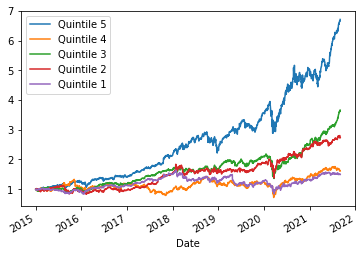

In [26]:
dfRes.plot()